## Imports and Packages

In [88]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Cost function

### $$f(x) = x^2 + x + 1$$

In [89]:
def f(x):
    return x**2 + x + 1

# Make Data

In [90]:
x_1 = np.linspace(start = -3, stop=3, num=500)

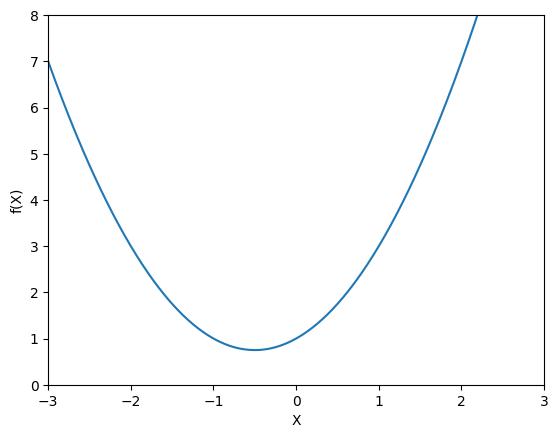

In [91]:
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x_1, f(x_1))

In [92]:
def df(x):
   return 2*x+1

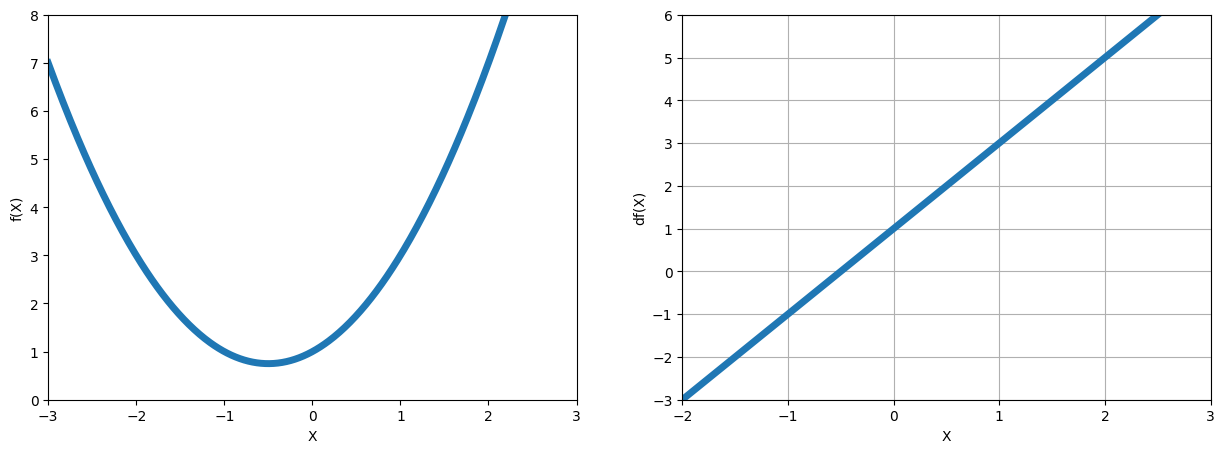

In [93]:
plt.figure(figsize= [15,5])
plt.subplot(1,2,1)

plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x_1, f(x_1), linewidth=5)

plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.xlabel('X')
plt.grid()
plt.ylabel('df(X)')
plt.plot(x_1, df(x_1), linewidth=5)

## Python Loops & Gradient Descent

In [94]:
for n in range(5):
    print("Hello World")
print("End of loop")


Hello World
Hello World
Hello World
Hello World
Hello World
End of loop


In [95]:
counter  = 0
while counter < 7:
    print('Counting ...', counter)
    counter += 1
print("Ready or not, here I came")

Counting ... 0
Counting ... 1
Counting ... 2
Counting ... 3
Counting ... 4
Counting ... 5
Counting ... 6
Ready or not, here I came


In [96]:
new_x = -3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(5000):
    previous_x = new_x
    gradient = df(previous_x) #steepness tells how far to bottom , # slope being very very high indicates being far from the minimum value
    new_x = previous_x - step_multiplier * gradient

    x_list.append(new_x)
    slope_list.append(df(new_x))

    step_size = abs(new_x - previous_x)
    #print(step_size)
    if step_size < precision:
        print(n)
        break

    

print('Local Minimum occurs at', new_x)
print('Slope or df(x) at this point is ', df(new_x))
print('f(x) value or cost at this point is ', f(new_x))


49
Local Minimum occurs at -0.5000356811923176
Slope or df(x) at this point is  -7.136238463512079e-05
f(x) value or cost at this point is  0.7500000012731475


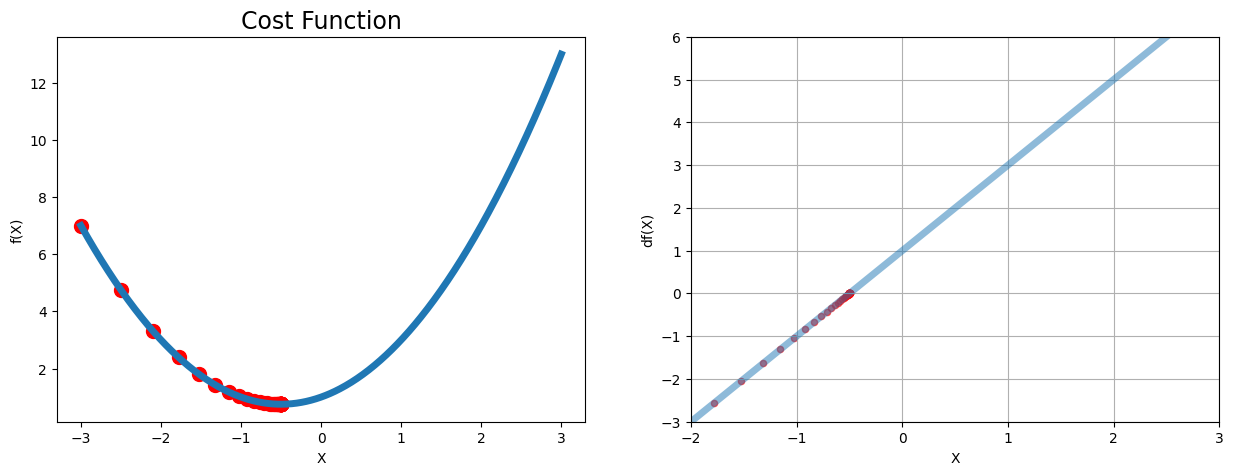

In [97]:
from turtle import color


plt.figure(figsize= [15,5])

#cost functions
plt.subplot(1,2,1)

plt.title('Cost Function', fontsize = 17)
plt.xlabel('X')
plt.ylabel('f(X)')

plt.plot(x_1, f(x_1), linewidth=5)

values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100)


# plot 2
plt.subplot(1,2,2)
plt.xlim([-2,3])
plt.ylim([-3,6])
plt.xlabel('X')
plt.grid()
plt.ylabel('df(X)')
plt.plot(x_1, df(x_1), linewidth=5, alpha=0.5)

plt.scatter(x_list, slope_list, color ="red", s=20, alpha=0.6)

# Multiple Minima vs initial guess and Advanced Functions

## $$g(X) = x^4- 4x^2 + 5$$

In [98]:
#Make some data

x_2 = np.linspace(-2, 2, 1000)


In [99]:
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

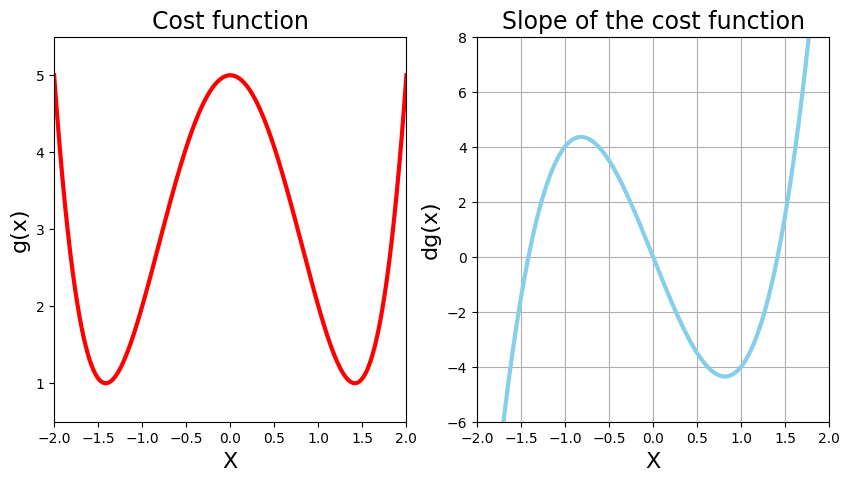

In [100]:
plt.figure(figsize=[10,5])


#1 chart cost function 
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)


plt.plot(x_2, g(x_2), color="red", linewidth = 3)


#2 derivative function

plt.subplot(1,2,2)

plt.title("Slope of the cost function", fontsize =17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16 )

plt.grid()
plt.xlim(-2,2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth= 3)



In [101]:
#gradient decent algorithm

def gradient_decent(derivative_func, initial_guess, multiplier, precision):
    new_x = initial_guess

    x_list = [new_x]
    slope_list  = [derivative_func(new_x)]

    for n in range(500):
        previous_x = new_x
        gradient  = derivative_func(previous_x)

        new_x = previous_x - multiplier *  gradient

        step_size = abs(new_x - previous_x)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if(step_size) < precision:
            print("Loop ran this many times: ", n)
            break

   
    return new_x, x_list, slope_list


In [102]:
local_min, list_x, deriv_list = gradient_decent(dg, 0, 0.01, 0.0001)

print('Local min occurs at: ',local_min)
print('Number of steps', len(list_x))



Loop ran this many times:  0
Local min occurs at:  0.0
Number of steps 2


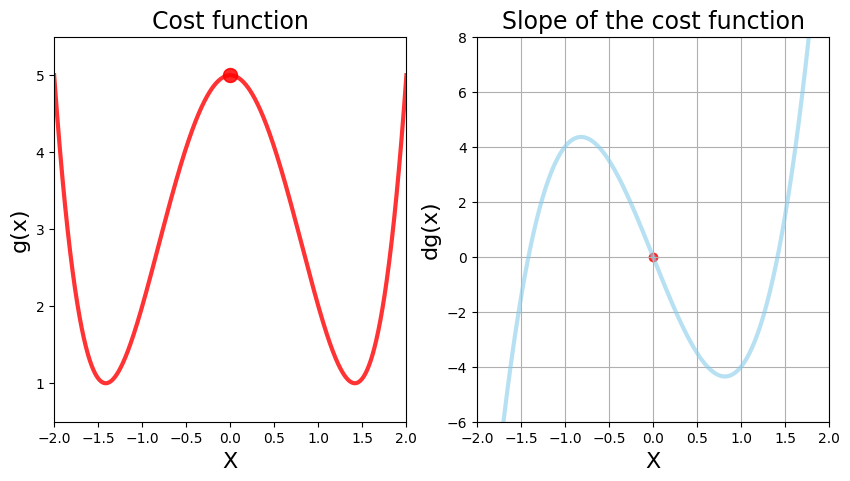

In [103]:
#Calling gradient descent function

plt.figure(figsize=[10,5])


#1 chart cost function 
plt.subplot(1,2,1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize = 17)
plt.xlabel('X', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)


plt.plot(x_2, g(x_2), color="red", linewidth = 3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)


#2 derivative function

plt.subplot(1,2,2)

plt.title("Slope of the cost function", fontsize =17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16 )

plt.grid()
plt.xlim(-2,2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth= 3, alpha=0.6)
plt.scatter(list_x, deriv_list, color="red",alpha=0.5)



Weakness detected

- Batch Gradient Descend

Depending on the slope the result will change
